In [1]:
%matplotlib inline
#%matplotlib notebook

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os

from ipywidgets import interactive
from ipywidgets import Dropdown, IntSlider
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import decode_predictions, preprocess_input
from keras.preprocessing import image
from procedural_noise import normalize, perlin, perturb

Using TensorFlow backend.


# Model & Images

<b>Model:</b> [InceptionV3](https://keras.io/applications/#inceptionv3) NN architecture using Keras weights from training on the ImageNet dataset. This achieves a top-1 accuracy of 77.9% and top-5 accuracy of 93.7%. Other models can be found [here](https://keras.io/applications/#documentation-for-individual-models). 
<br><b>Images:</b> Stock photos taken from [Pexels](https://www.pexels.com/).

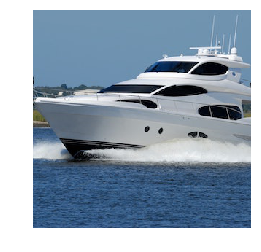

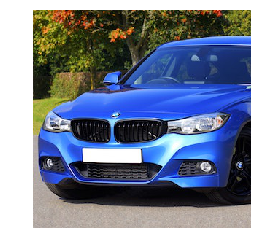

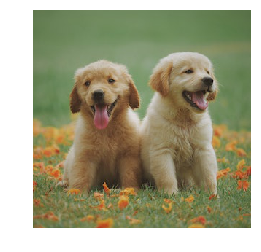

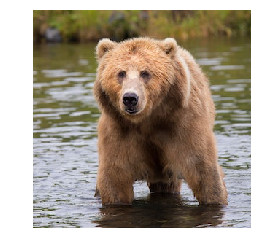

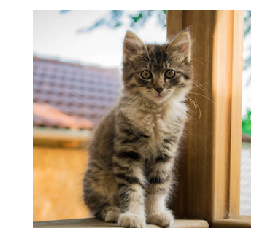

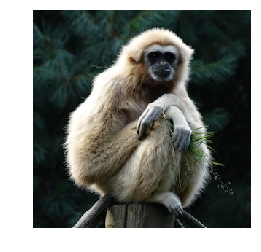

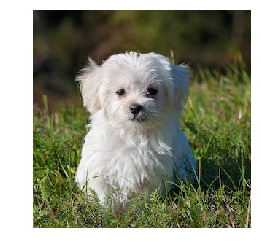

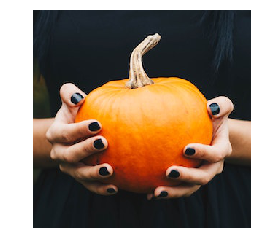

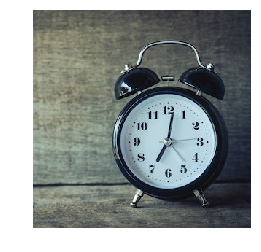

In [3]:
img_dir = 'images/'

# Specify image dimensions
x_dim = 299
y_dim = 299

# Load model
model = InceptionV3(weights = 'imagenet')

# Load images
all_images = {}
for filename in os.listdir(img_dir):
    if not filename.startswith('.'):
        img = image.load_img(img_dir + filename, target_size = (x_dim, y_dim)) # We assume all images have the same dimensions
        img = image.img_to_array(img)
        all_images[filename.split('.')[0]] = img

# Display images
for key, vals in all_images.items():
    fig2 = plt.figure()
    plt.axis('off')
    plt.imshow(vals.astype(np.uint8))

# Interactive Slider

<b>Play</b> with the parameters of the noise function below. You'll find that it's easier to fool the classifier on some images over others!

In [9]:
# Interactive slider
def PlotPerlin(img_key, max_norm, period, freq_sine):
    image = all_images[img_key]
    fig = plt.figure(figsize = (18, 7))
    for i in range(2):
        for j in range(5):
            ax = fig.add_subplot(2, 5, i * 5 + j + 1)
            if j != 0: noise = perlin(x_dim = x_dim, y_dim = y_dim, period = period, octave = j, freq_sine = freq_sine)
            if i == 0:
                if j == 0:
                    noise = np.ones((x_dim, y_dim, 3))
                    ax.axis('off')
                else:
                    ax.set_title('Noise Octave %i' % j)
                plt.imshow((noise.reshape(x_dim, y_dim, 3) + 1) / 2, cmap = plt.cm.gray)
            else:
                if j == 0:
                    noise = np.zeros((x_dim, y_dim, 3))
                    ax.set_title('Original Image')
                payload = perturb(orig = image, max_norm = max_norm, noise = noise)
                plt.imshow(payload.astype(np.uint8))
                prob = model.predict(preprocess_input(payload.astype(np.float).reshape((1, x_dim, y_dim, 3))))
                plt.xlabel('\n'.join((item[1]  + '  %.3f' % item[2]) for item in decode_predictions(prob)[0]), horizontalalignment = 'right', x = 1, size = 12)

# Parameter sliders
s_img_key = Dropdown(options = list(all_images.keys()), description = 'Image:')
s_max_norm = IntSlider(min = 0, max = 64, value = 12, step = 2, continuous_update = False, description = 'Max Change:')
s_period = IntSlider(min = 2, max = 180, value = 60, step = 1, continuous_update = False, description = 'Period:')
s_freq_sine = IntSlider(min = 0, max = 60, value = 36, step = 1, continuous_update = False, description = 'Freq Sine:')

interactive(PlotPerlin, img_key = s_img_key, max_norm = s_max_norm, period = s_period, freq_sine = s_freq_sine)

interactive(children=(Dropdown(description='Image:', options=('Boat', 'Blue Car', 'Golden Retriever', 'Brown B…

The classifier's top 5 predictions are displayed under each image. The top row consists of the noise patterns while the bottom row consists of their corresponding altered images.